In [ ]:
!pip install pandas_ta

In [2]:
# Librerías:
import datetime
import plotly.graph_objects as go
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from pandas_datareader import data as pdr
import pandas_datareader as pdr
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm
import pandas_ta as ta
import yfinance as yf
yf.pdr_override()
from datetime import datetime, timedelta
from plotly.subplots import make_subplots

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargar datos:
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Trabajo investigación Bonos Colombianos/Rendimientos bonos mensual.xlsx")
#datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Trabajo investigación Bonos Colombianos/Rendimientos bonos diario .xlsx")
usdcop = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Trabajo investigación Bonos Colombianos/USDCOPdesde2003diario.xlsx")
tasasdeinteres = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Trabajo investigación Bonos Colombianos/Tasasdeinterescolombia.xlsx")
inflacion = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Trabajo investigación Bonos Colombianos/Inflacióncolombia.xlsx")
desempleo = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Trabajo investigación Bonos Colombianos/Desempleo.xlsx")
crecimiento = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Trabajo investigación Bonos Colombianos/Crecimiento anual.xlsx")

# ==============================================================================

# Ejecutar 1 vez la conversión de las fechas como índice:

datos["Fecha"]=pd.to_datetime((datos["Fecha"]))#, format='%Y%m')
#datos.set_index("Fecha", inplace=True)
#datos=datos.asfreq("M")
#]datos = datos["Fecha"].loc["2005-01-01":"2023-07-30"]

usdcop["Fecha"]=pd.to_datetime((usdcop["Fecha"]), format='%Y%m')
usdcop.set_index("Fecha", inplace=True)
usdcop = usdcop.asfreq("M")
#usdcop = usdcop.loc['2005-01-01':'2023-06-30']
usdcop = usdcop.reset_index()
#datos["usdcop"]=usdcop["Trm"]


tasasdeinteres["Fecha"]=pd.to_datetime((tasasdeinteres["Fecha"]), format='%Y%m')
tasasdeinteres.set_index("Fecha", inplace=True)
tasasdeinteres=tasasdeinteres.asfreq("M")
tasasdeinteres = tasasdeinteres.loc['2003-01-01':'2024-07-31']
tasasdeinteres = tasasdeinteres.reset_index()

desempleo["Fecha"]= pd.to_datetime((desempleo['Fecha']))#.astype(str), format='%Y%m')
desempleo.set_index("Fecha", inplace=True)
desempleo = desempleo.loc["2003-01-01":"2024-01-01"]
desempleo = desempleo.reset_index()

inflacion["Fecha"] = pd.to_datetime((inflacion['Fecha']).astype(str), format='%Y%m')
inflacion.set_index("Fecha", inplace=True)
inflacion = inflacion.loc['2003-01-01':'2024-07-01']
inflacion = inflacion.reset_index()
#inflacion["Fecha"] = datos["Fecha"]
#inflacion=inflacion.asfreq("M")

crecimiento["Fecha"] = pd.to_datetime((crecimiento["Fecha"]), format="%Y%m")
crecimiento.set_index("Fecha", inplace=True)
crecimiento = crecimiento.asfreq("M")
crecimiento = crecimiento.loc["2003-01-01":"2024-01-01"]
crecimiento = crecimiento.fillna(method='ffill', limit=100)
crecimiento = crecimiento.reset_index()

datos["Tasa"]=tasasdeinteres["Tasa"]
datos["Inflacion"]=inflacion["Inflación"]
datos["usdcop"]=usdcop["Trm"]
datos["Desempleo"]=desempleo["Desempleo %"]
datos["Crecimiento"]=crecimiento["Crecimiento anual %"]
datos = datos.fillna(method='ffill', limit=100)
datos.set_index("Fecha", inplace=True)
datos = datos.loc["2005-01-01":"2023-07-30"]
datos
# ==============================================================================

,Uno,Cinco,Diez,usdcop,Tasa,Inflacion,Desempleo,Crecimiento
Fecha,,,,,,,,
2005-01-31,7.652220,11.620934,13.360149,2367.76,6.50,5.43,13.262600,5.333022
2005-02-28,7.738382,11.425494,13.089509,2323.77,6.50,5.25,14.096900,5.333022
2005-03-31,7.718097,12.257709,13.407951,2376.48,6.50,5.03,12.954300,5.333022
2005-04-29,7.415322,11.427901,13.644085,2348.32,6.50,5.01,12.020500,5.333022
2005-05-31,7.322461,10.908527,13.322616,2332.79,6.50,5.04,12.490700,5.333022
...,...,...,...,...,...,...,...,...
2023-02-28,11.867354,12.871927,13.433376,4808.14,12.75,13.28,11.353126,7.495776
2023-03-31,10.808810,11.455734,11.948172,4627.27,13.00,13.34,10.032544,7.495776
2023-04-28,11.254593,11.463802,11.890927,4669.00,13.00,12.82,10.724700,7.495776


In [5]:
datos.to_excel('Datos de bonos colombianos y variables macro.xlsx', index=True)

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Regresión líneal para explicar los datos de los rendimientos


In [6]:
datos_corr = datos.corr()
datos_corr

,Uno,Cinco,Diez,usdcop,Tasa,Inflacion,Desempleo,Crecimiento
Uno,1.000000,0.905245,0.822240,0.120266,0.941489,0.838126,-0.183155,0.632652
Cinco,0.905245,1.000000,0.974949,0.060674,0.780136,0.725053,-0.035853,0.529398
Diez,0.822240,0.974949,1.000000,0.105550,0.695950,0.686351,0.041449,0.459433
usdcop,0.120266,0.060674,0.105550,1.000000,0.129257,0.515594,0.221330,-0.112146
Tasa,0.941489,0.780136,0.695950,0.129257,1.000000,0.819122,-0.204329,0.548999
Inflacion,0.838126,0.725053,0.686351,0.515594,0.819122,1.000000,-0.160718,0.481006
Desempleo,-0.183155,-0.035853,0.041449,0.221330,-0.204329,-0.160718,1.000000,-0.224968
Crecimiento,0.632652,0.529398,0.459433,-0.112146,0.548999,0.481006,-0.224968,1.000000


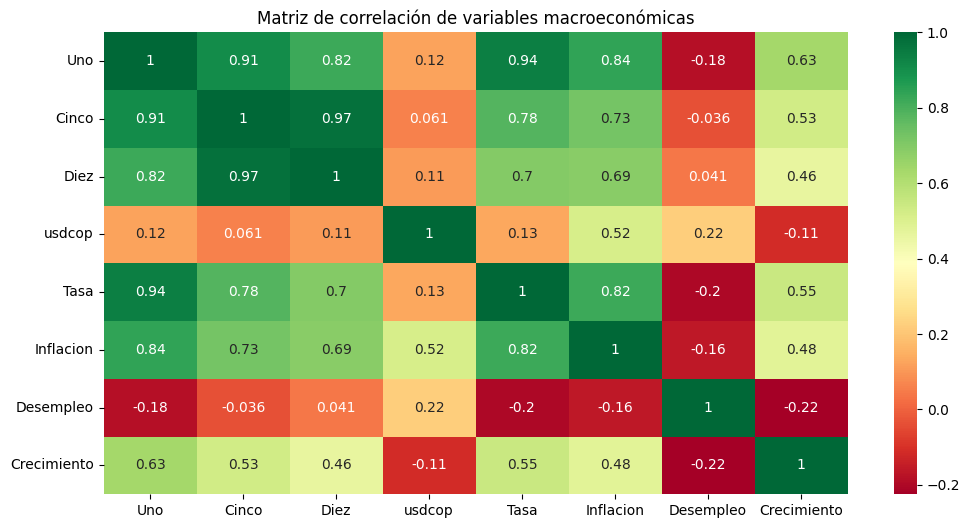

In [7]:
# Gráfico de la correlación
plt.figure(figsize=(12, 6))
sns.heatmap(datos_corr, annot=True, cmap="RdYlGn")
plt.title('Matriz de correlación de variables macroeconómicas')
#plt.savefig("correlación", dpi=1500)
plt.show()

In [8]:
# Modelo de regresión explicativo:
model = "Cinco~Tasa + Inflacion + Crecimiento"
results = sm.ols(formula=model, data=datos).fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Cinco   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.41e-48
Time:                        22:20:20   Log-Likelihood:                -377.02
No. Observations:                 222   AIC:                             762.0
Df Residuals:                     218   BIC:                             775.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9318      0.212     18.512      

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the independent variables (features) and the dependent variable (target)
features = datos[['Tasa', 'Inflacion', 'Crecimiento']]
targets = datos[['Uno', 'Cinco', 'Diez']]

# Split the datos into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Create a dictionary to store the models and their performance
models = {}
performance = {}

for bond in ['Uno', 'Cinco', 'Diez']:
    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train[bond])

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test[bond], predictions))
    r2 = r2_score(y_test[bond], predictions)

    # Store the model and its performance
    models[bond] = model
    performance[bond] = {'RMSE': rmse, 'R^2': r2}

performance

{'Uno': {'RMSE': 0.6326463511976353, 'R^2': 0.9190763549386182},
 'Cinco': {'RMSE': 1.3243471494476127, 'R^2': 0.5948450956652576},
 'Diez': {'RMSE': 1.3425565526735155, 'R^2': 0.5120499313716524}}

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [11]:
# Gráfico interactivo de los rendimientos, las tasas y la inflación:

fig = go.Figure()
fig.add_trace(go.Scatter(x=datos.index, y=datos["Cinco"], name="Rendimiento bonos a 5 años"))
fig.add_trace(go.Scatter(x=datos.index, y=datos["Inflacion"], name="Inflacion"))
fig.add_trace(go.Scatter(x=datos.index, y=datos["Tasa"], name="Tasas de interés"))
#fig.add_trace(go.Scatter(x=datos.index, y=datos["usdcop"], name="Precio dólar"))
#fig.add_trace(go.Scatter(x=datos.index, y=datos["Desempleo"], name="Desempleo"))


fig.update_layout(
    title="Rendimiento bonos a 5 años",
    xaxis_title="Fecha",
    yaxis_title="Rendimiento",
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(size=12),
    )
)
fig.show()

In [12]:
# Gráficos con diferentes escalas

# Crea una figura con especificaciones para un eje Y secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Agrega las trazas al gráfico
fig.add_trace(go.Scatter(x=datos.index, y=datos["Cinco"], name="Rendimiento bonos a 5 años"), secondary_y=False)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Inflacion"], name="Inflacion"), secondary_y=False)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Tasa"], name="Tasas de interés"), secondary_y=False)
#fig.add_trace(go.Scatter(x=datos.index, y=datos["usdcop"], name="Precio dólar"), secondary_y=True)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Crecimiento"], name="Crecimiento anual"), secondary_y=False)
#fig.add_trace(go.Scatter(x=datos.index, y=datos["Desempleo"], name="Desempleo"), secondary_y=False)

# Configura los títulos de los ejes y la leyenda
fig.update_layout(
    title="Rendimiento bonos a 5 años",
    xaxis_title="Fecha",
    yaxis_title="Rendimiento, Inflación, Tasas de interés",
    legend=dict(
        x=0,
        y=0,
        traceorder="normal",
        font=dict(size=12),
    )
)

# Configura el título del eje Y secundario
fig.update_yaxes(title_text="Precio dólar", secondary_y=True)

fig.show()

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Uso del RSI

In [14]:
# Aplicar Indicador Técnico RSI:
datos['RSI'] = ta.rsi(datos["Cinco"], length=5)
datos["Línea sobre compra"] = 70
datos["Línea sobre venta"] = 30
#datos = datos.set_index("Fecha")

In [15]:
# Inicializa una variable para rastrear los cruces del RSI
cruce_rsi_compra = False
cruce_rsi_venta = False
cruce_indices_compra = []
cruce_indices_venta = []

# Recorre los datos del RSI
for i in range(1, len(datos["RSI"])):
    if datos["RSI"][i-1] > 70 and datos["RSI"][i] < 70:
      cruce_indices_compra.append(datos.index[i])
      cruce_rsi_compra = True

for i in range(1, len(datos["RSI"])):
    if datos["RSI"][i-1] < 15 and datos["RSI"][i] > 15:
      cruce_indices_venta.append(datos.index[i])
      cruce_rsi_venta = True

cruce_indices_compra=pd.DataFrame(cruce_indices_compra)
cruce_indices_venta=pd.DataFrame(cruce_indices_venta)

cruce_indices_compra.set_index([0], inplace=True)
cruce_indices_venta.set_index([0], inplace=True)

# Convertir los datos de las fechas
cruce_indices_compra=pd.to_datetime(cruce_indices_compra.index)
cruce_indices_venta=pd.to_datetime(cruce_indices_venta.index)

In [16]:
# =============================================================================.
# Crea una figura con especificaciones para un eje Y secundario
fig = make_subplots(rows=2, cols=1)

# Gráfico de datos y RSI
fig.add_trace(go.Scatter(x=datos.index, y=datos["Cinco"], name="Datos originales"), row=1, col=1)
fig.add_trace(go.Scatter(x=datos.index, y=datos["RSI"], name="Valores del indicador", line=dict(color="blue")), row=2, col=1)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Línea sobre compra"], name="Nivel sobre compra", line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Línea sobre venta"], name="Nivel sobre venta", line=dict(color='red')), row=2, col=1)

for fecha in cruce_indices_compra:
  fig.add_vline(x=fecha, line_dash="dash", line_color="green", line_width=2, opacity=0.8, name="Cruces RSI")

for fecha in cruce_indices_venta:
  fig.add_vline(x=fecha, line_dash="dash", line_color="red", line_width=2, opacity=0.8, name="Cruces RSI")

fig.update_layout(
    title="Estrategia aplicada al rendimiento de los bonos",
    xaxis_title="Fecha",
    yaxis_title="Valores",
    legend=dict(
        x=1,
        y=0,
        xanchor="auto",
        yanchor="auto",
        traceorder="normal",
        font=dict(size=12),
    )
)


fig.show()
# =============================================================================

In [17]:
# =============================================================================
# Gráfico rendimientos con cruces
fig = go.Figure()
fig.add_trace(go.Scatter(x=datos.index, y=datos["Cinco"], name="Rendimiento de cierre mensual"))


for fecha in cruce_indices_compra:
  fig.add_vline(x=fecha, line_dash="dash", line_color="green", line_width=2, opacity=0.8, name="Cruces RSI")

for fecha in cruce_indices_venta:
  fig.add_vline(x=fecha, line_dash="dash", line_color="red", line_width=2, opacity=0.8, name="Cruces RSI")

fig.update_layout(
    title="Estrategia aplicada al rendimiento de los bonos a 5 años",
    xaxis_title="Fecha",
    yaxis_title="Rendimiento",
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(size=12),
    )
)
fig.show()
# =============================================================================

In [18]:
# Gráfico RSI

# =============================================================================.
# Crea una figura con especificaciones para un eje Y secundario
fig = make_subplots(rows=1, cols=1)

# Gráfico de datos y RSI
#fig.add_trace(go.Scatter(x=datos.index, y=datos["Cinco"], name="Datos originales"), row=1, col=1)
fig.add_trace(go.Scatter(x=datos.index, y=datos["RSI"], name="Valores del indicador", line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Línea sobre compra"], name="Nivel sobre compra", line=dict(color='green')), row=1, col=1)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Línea sobre venta"], name="Nivel sobre venta", line=dict(color='red')), row=1, col=1)

#for fecha in cruce_indices_compra:
#  fig.add_vline(x=fecha, line_dash="dash", line_color="green", line_width=2, opacity=0.8, name="Cruces RSI")
#
#for fecha in cruce_indices_venta:
#  fig.add_vline(x=fecha, line_dash="dash", line_color="red", line_width=2, opacity=0.8, name="Cruces RSI")

fig.update_layout(
    title="Indicador de fuerza relativa",
    xaxis_title="Fecha",
    yaxis_title="Valores",
    legend=dict(
        x=1,
        y=0,
        xanchor="auto",
        yanchor="auto",
        traceorder="normal",
        font=dict(size=12),
    )
)


fig.show()
# =============================================================================


In [19]:
# Sustentación con variables macroeconómicas:

# Gráficos con diferentes escalas

# Crea una figura con especificaciones para un eje Y secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Agrega las trazas al gráfico
fig.add_trace(go.Scatter(x=datos.index, y=datos["Cinco"], name="Rendimiento bonos a 5 años"), secondary_y=False)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Inflacion"], name="Inflacion"), secondary_y=False)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Tasa"], name="Tasas de interés"), secondary_y=False)
#fig.add_trace(go.Scatter(x=datos.index, y=datos["usdcop"], name="Precio dólar"), secondary_y=True)
fig.add_trace(go.Scatter(x=datos.index, y=datos["Crecimiento"], name="Crecimiento anual"), secondary_y=False)
#fig.add_trace(go.Scatter(x=datos.index, y=datos["Desempleo"], name="Desempleo"), secondary_y=False)

for fecha in cruce_indices_compra:
  fig.add_vline(x=fecha, line_dash="dash", line_color="green", line_width=2, opacity=0.8, name="Cruces RSI")

for fecha in cruce_indices_venta:
  fig.add_vline(x=fecha, line_dash="dash", line_color="red", line_width=2, opacity=0.8, name="Cruces RSI")

# Configura los títulos de los ejes y la leyenda
fig.update_layout(
    title="Rendimiento de los bonos junto a variables macroeconómicas y la estrategia",
    xaxis_title="Fecha",
    yaxis_title="Valores",
    legend=dict(
        x=0,
        y=0,
        traceorder="normal",
        font=dict(size=12),
    )
)

# Configura el título del eje Y secundario
fig.update_yaxes(title_text="Precio dólar", secondary_y=True)

fig.show()